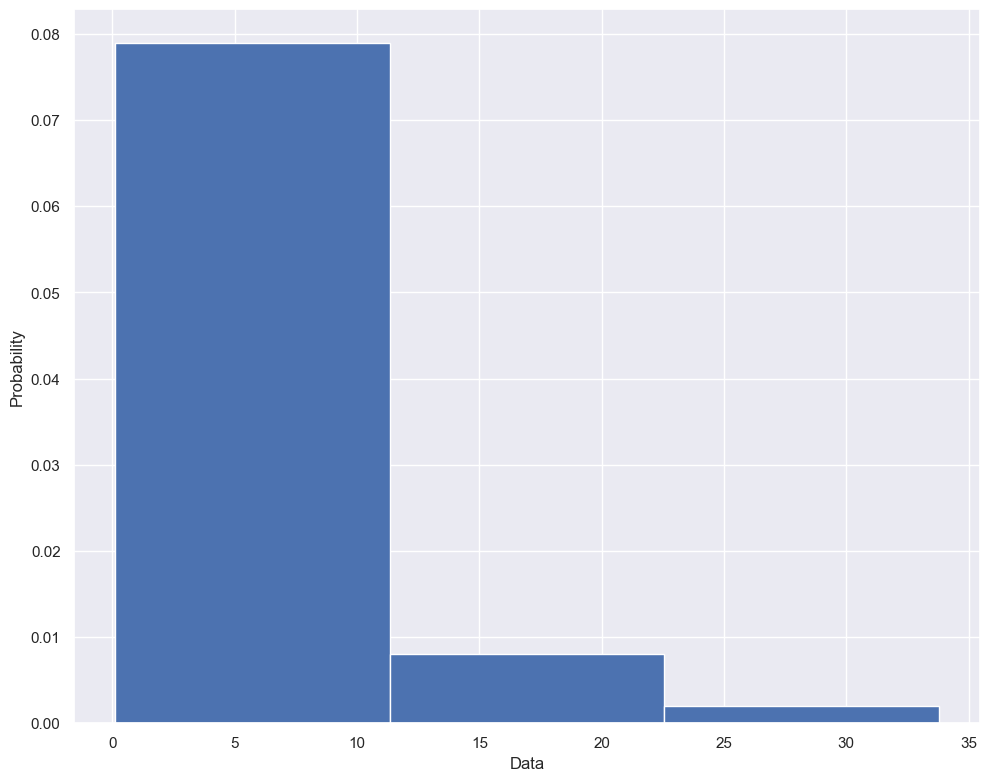

In [48]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

dataset_debt_service = pd.read_csv('ITRM_Assessment_2A_Dataset.csv', sep=';', decimal=',')



       Debt_Service_2019  Debt_Service_2021
count          38.000000          38.000000
mean            8.044737           8.250000
std             6.360210           6.801619
min             1.000000           0.700000
25%             4.425000           3.700000
50%             5.700000           6.300000
75%             9.050000           9.650000
max            27.300000          25.600000
       Debt_Service_2019  Debt_Service_2021
count          44.000000          44.000000
mean            7.177273           5.518182
std            14.694847           6.387935
min             0.100000           0.100000
25%             1.575000           1.600000
50%             3.500000           3.950000
75%             6.300000           6.600000
max            92.900000          33.800000


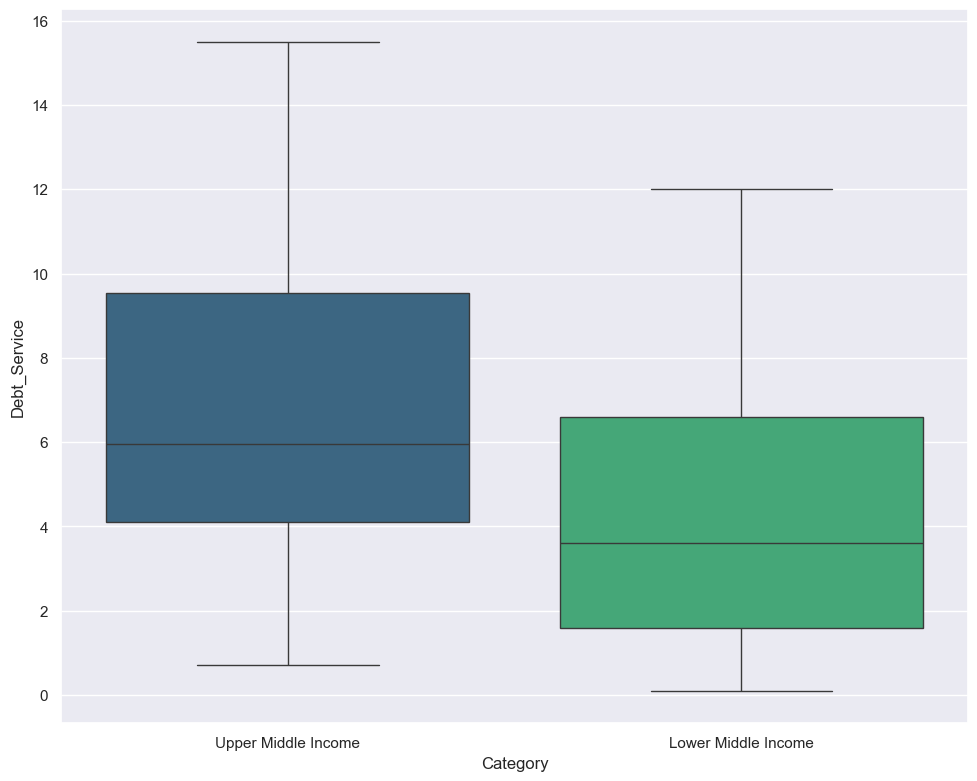

In [102]:
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme(rc={'figure.figsize':(11.7,9.27)})

dataset_debt_service = pd.read_csv('ITRM_Assessment_2A_Dataset.csv', sep=';', decimal=',')
debt_service_melt = pd.melt(dataset_debt_service[['Country','Debt_Service_2021','Category']], id_vars=['Country','Category'], value_vars=['Debt_Service_2019','Debt_Service_2021'], var_name='Year', value_name='Debt_Service')
debt_service_melt['Year'] = debt_service_melt['Year'].str[-4:]

sns.boxplot(x = debt_service_melt['Category'], 
            y = debt_service_melt['Debt_Service'], 
            hue = debt_service_melt['Category'], showfliers=False, palette='viridis')

upper_mi = dataset_debt_service[dataset_debt_service['Category']=='Upper Middle Income']
lower_mi = dataset_debt_service[dataset_debt_service['Category']=='Lower Middle Income']
print(upper_mi[['Debt_Service_2019','Debt_Service_2021']].describe())
print(lower_mi[['Debt_Service_2019','Debt_Service_2021']].describe())

In [55]:
list(debt_service_melt['Year'].unique())

['2019', '2021']

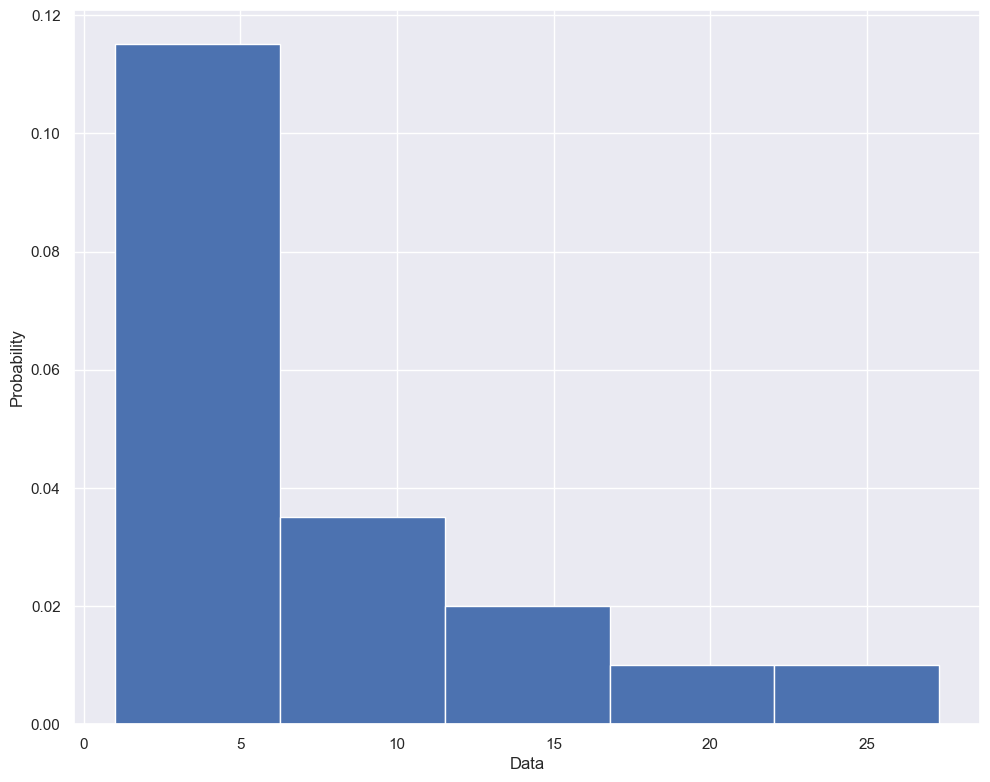

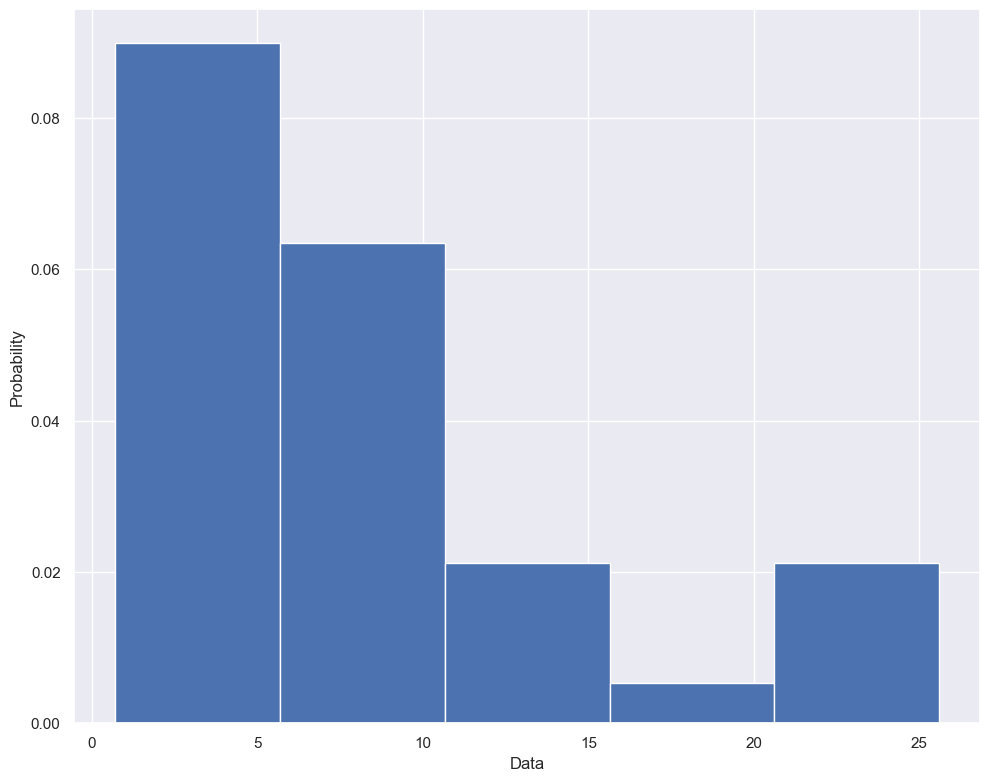

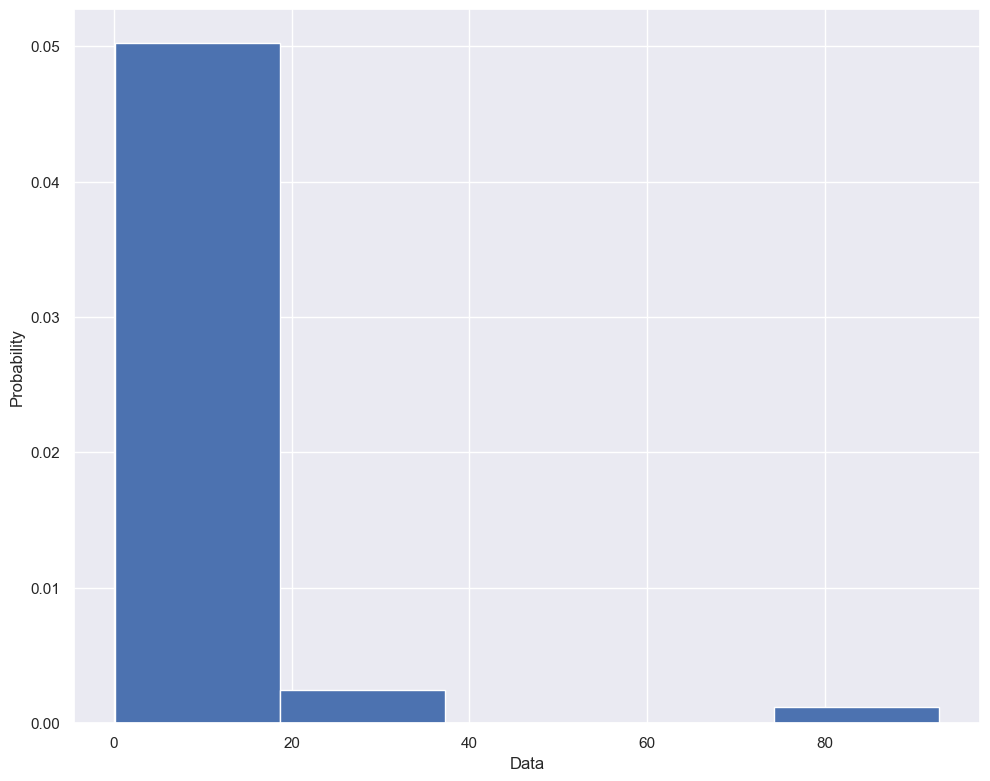

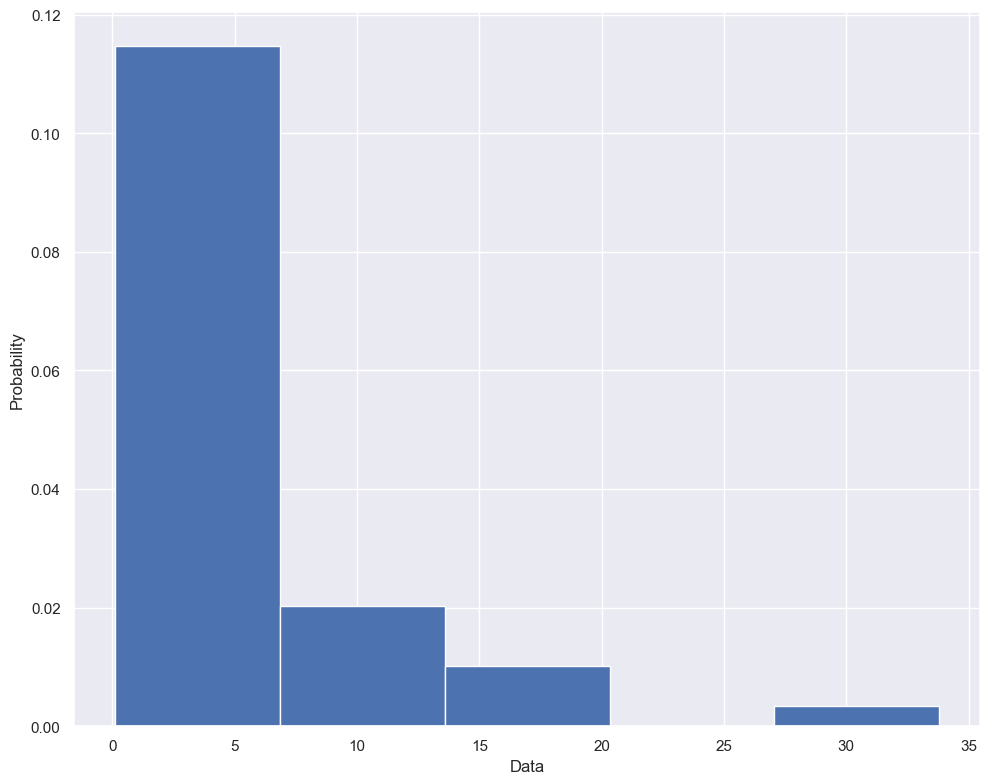

In [73]:
for cat in list(debt_service_melt['Category'].unique()):
    for year in list(debt_service_melt['Year'].unique()):
        x = debt_service_melt[debt_service_melt['Category']==cat]
        x = x[x['Year']==year][['Debt_Service']] 
        plt.hist(x, density=True, bins=5)  # density=False would make counts
        plt.ylabel('Probability')
        plt.xlabel('Data')
        plt.show()

In [72]:
debt_service_melt[debt_service_melt['Debt_Service']>30]

,Country,Category,Year,Debt_Service
44,Lebanon,Lower Middle Income,2019,36.8
50,Mongolia,Lower Middle Income,2019,92.9
126,Lebanon,Lower Middle Income,2021,33.8


In [80]:
dataset_debt_service.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            82 non-null     object 
 1   Debt_Service_2017  82 non-null     float64
 2   Debt_Service_2018  82 non-null     float64
 3   Debt_Service_2019  82 non-null     float64
 4   Debt_Service_2020  82 non-null     float64
 5   Debt_Service_2021  82 non-null     float64
 6   Category           82 non-null     object 
 7   GDP_Growth_2017    82 non-null     float64
 8   GDP_Growth_2018    82 non-null     float64
 9   GDP_Growth_2019    82 non-null     object 
 10  GDP_Growth_2020    82 non-null     float64
 11  GDP_Growth_2021    82 non-null     float64
 12  GDP_Growth_2022    82 non-null     object 
dtypes: float64(9), object(4)
memory usage: 8.5+ KB


In [97]:
dataset_regression=dataset_debt_service[['Country','Category','Debt_Service_2021','GDP_Growth_2021']]
dataset_regression_lower_middle = dataset_regression[dataset_regression['Category']=='Lower Middle Income']
dataset_regression_upper_middle = dataset_regression[dataset_regression['Category']=='Upper Middle Income']
dataset_regression_upper_middle.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38 entries, 0 to 74
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            38 non-null     object 
 1   Category           38 non-null     object 
 2   Debt_Service_2021  38 non-null     float64
 3   GDP_Growth_2021    38 non-null     float64
dtypes: float64(2), object(2)
memory usage: 1.5+ KB


Text(0.5, 1.0, 'Relationship between Debt Service and GDP Growth in Lower Middle-Income Countries')

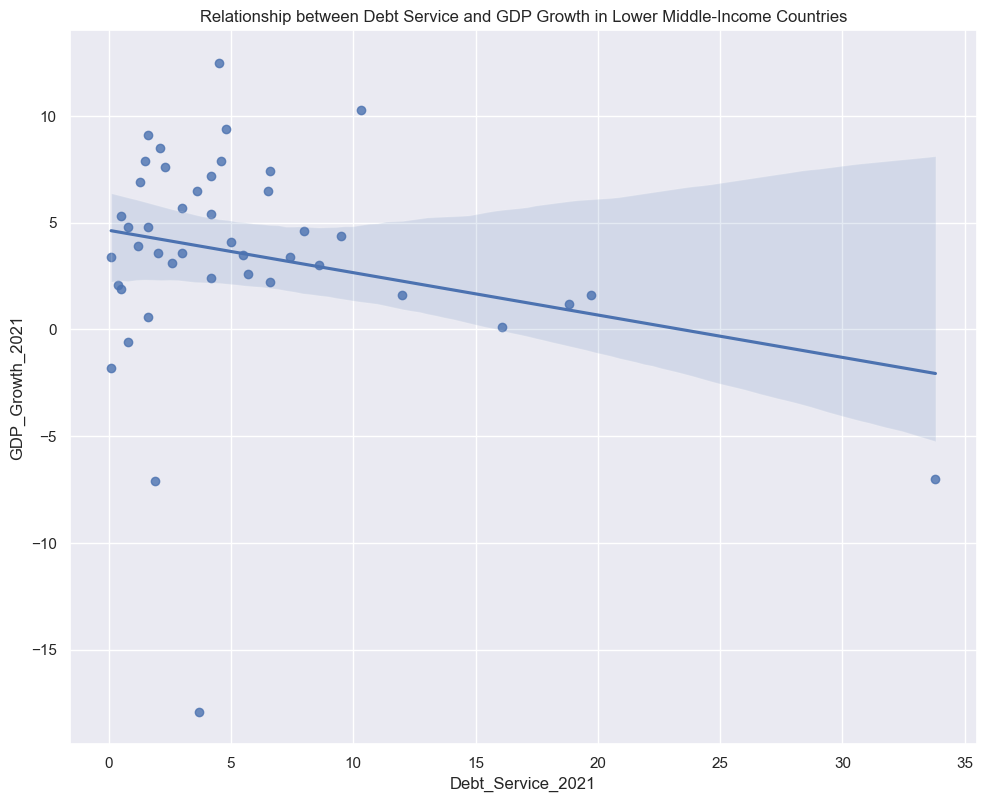

In [100]:
sns.regplot(x=dataset_regression_lower_middle[['Debt_Service_2021']], y=dataset_regression_lower_middle[['GDP_Growth_2021']]).set_title('Relationship between Debt Service and GDP Growth in Lower Middle-Income Countries')

Text(0.5, 1.0, 'Relationship between Debt Service and GDP Growth in Upper Middle-Income Countries')

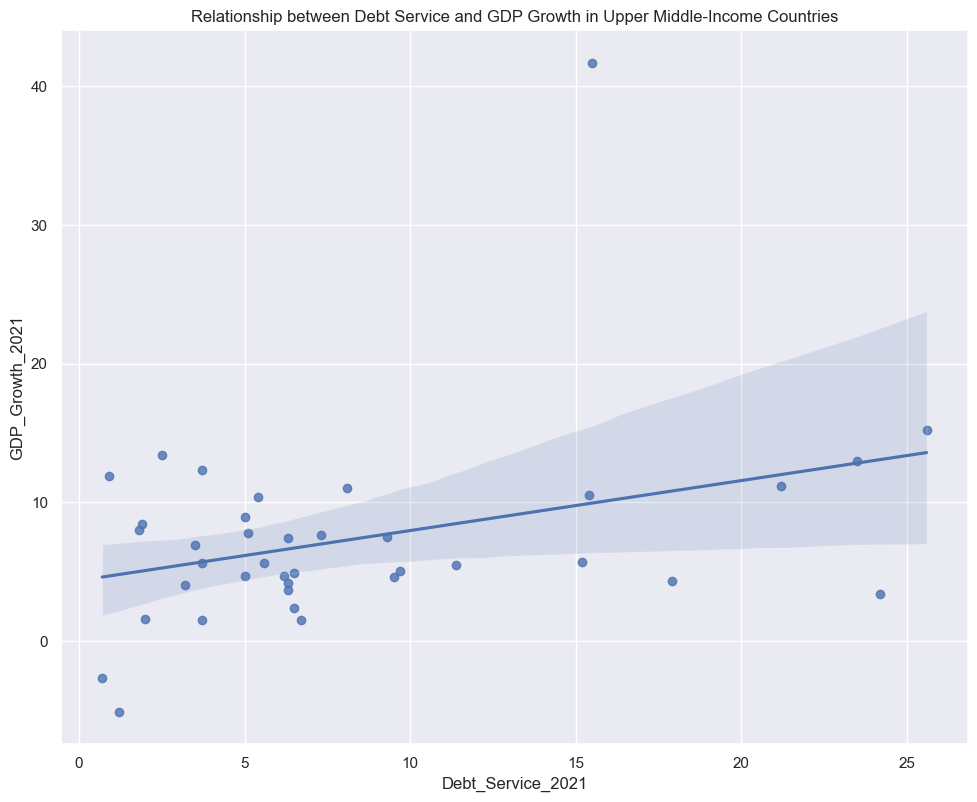

In [110]:
sns.regplot(x=dataset_regression_upper_middle[['Debt_Service_2021']], y=dataset_regression_upper_middle[['GDP_Growth_2021']]).set_title('Relationship between Debt Service and GDP Growth in Upper Middle-Income Countries')

Text(0.5, 1.0, 'Comparison of Debt Service between Lower Middle-Income Countries and Upper Middle-Income Countries')

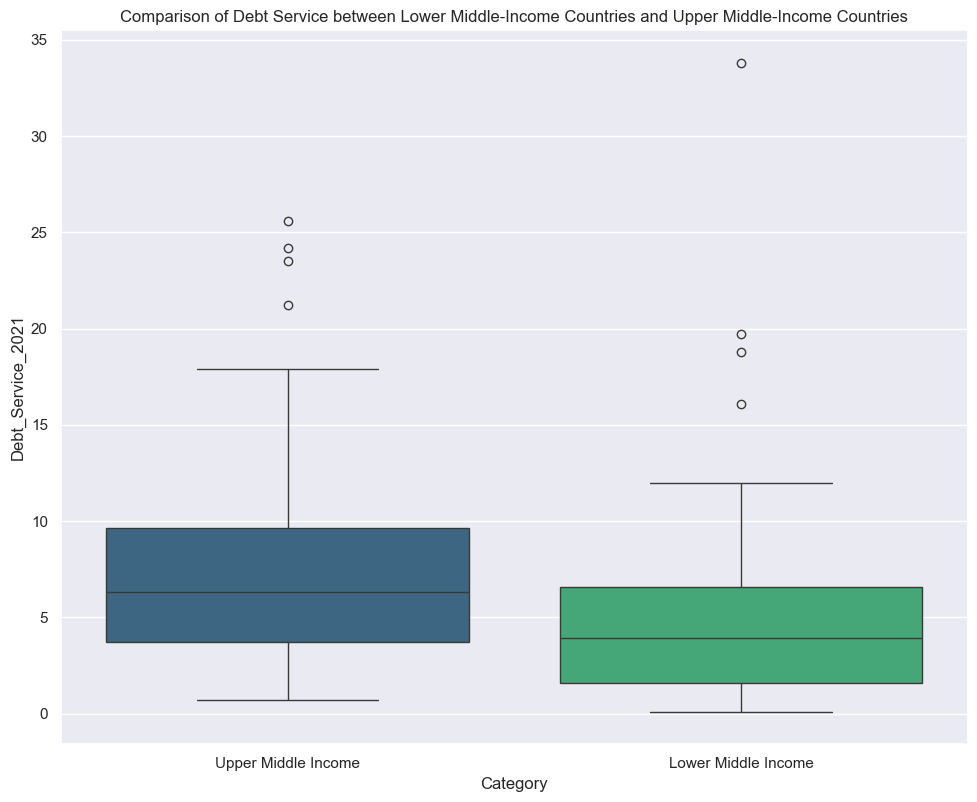

In [132]:
dataset_boxplot = dataset_debt_service[['Country','Debt_Service_2021','GDP_Growth_2021','Category']]
sns.boxplot(x = dataset_boxplot['Category'], 
            y = dataset_boxplot['Debt_Service_2021'], 
            hue = dataset_boxplot['Category'],  palette='viridis').set_title('Comparison of Debt Service between Lower Middle-Income Countries and Upper Middle-Income Countries')

Text(0.5, 1.0, 'Comparison of GDP Growth between Lower Middle-Income Countries and Upper Middle-Income Countries')

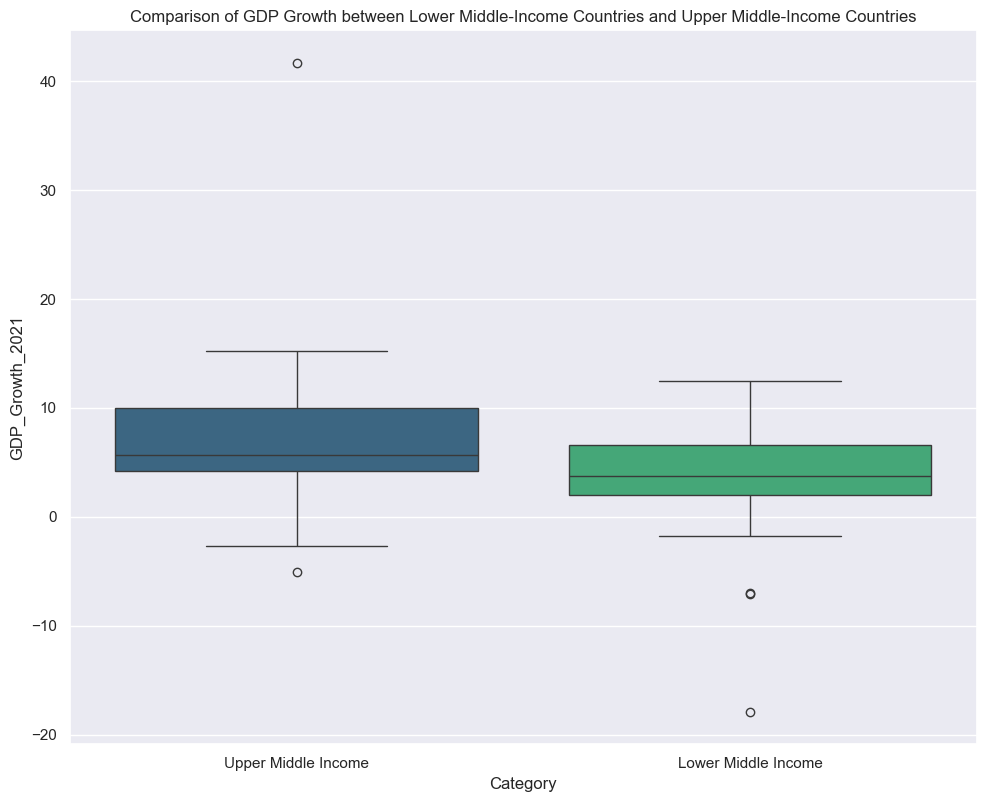

In [134]:
sns.boxplot(x = dataset_boxplot['Category'], 
            y = dataset_boxplot['GDP_Growth_2021'], 
            hue = dataset_boxplot['Category'], palette='viridis').set_title('Comparison of GDP Growth between Lower Middle-Income Countries and Upper Middle-Income Countries')

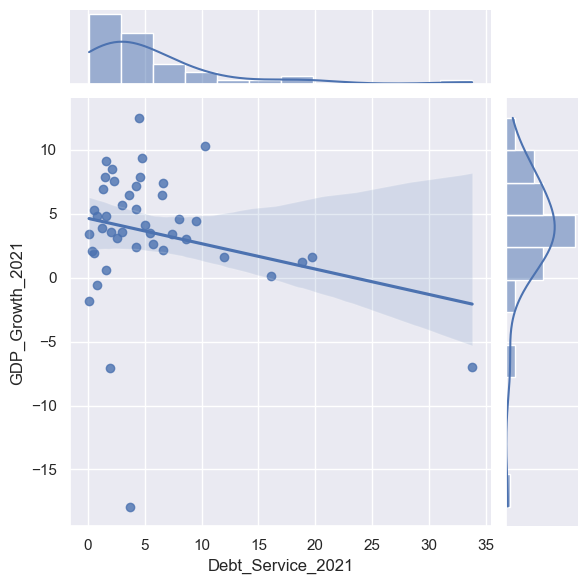

In [136]:
sns.jointplot(data=dataset_regression_lower_middle, x="Debt_Service_2021", y="GDP_Growth_2021", kind="reg")

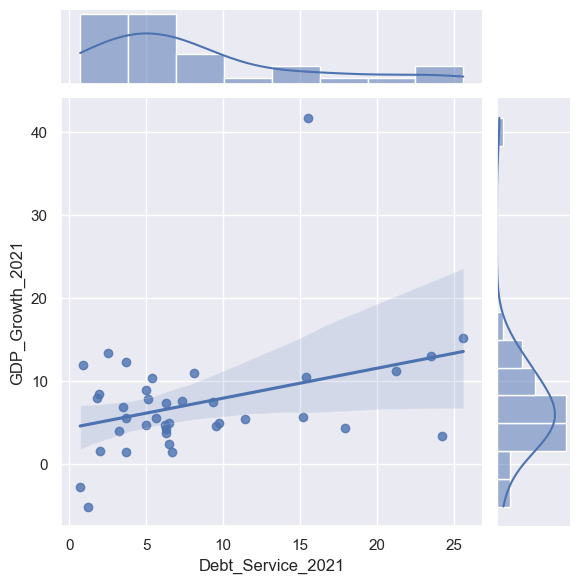

In [122]:
sns.jointplot(data=dataset_regression_upper_middle, x="Debt_Service_2021", y="GDP_Growth_2021", kind="reg")

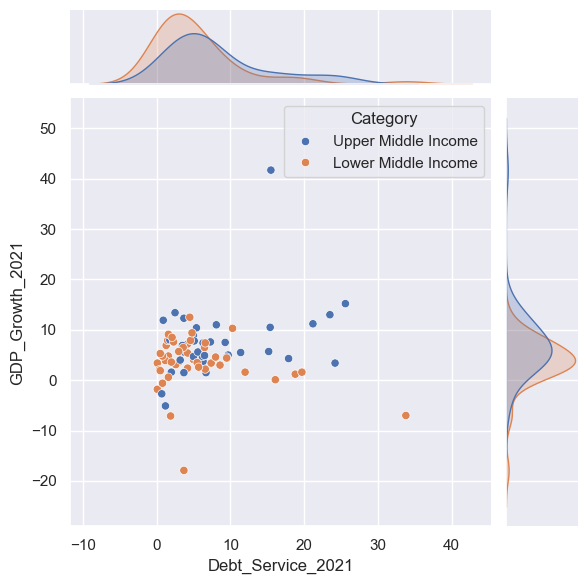

In [131]:
sns.jointplot(data=dataset_regression, hue="Category", x="Debt_Service_2021", y="GDP_Growth_2021")

<Axes: xlabel='Debt_Service_2021', ylabel='Count'>

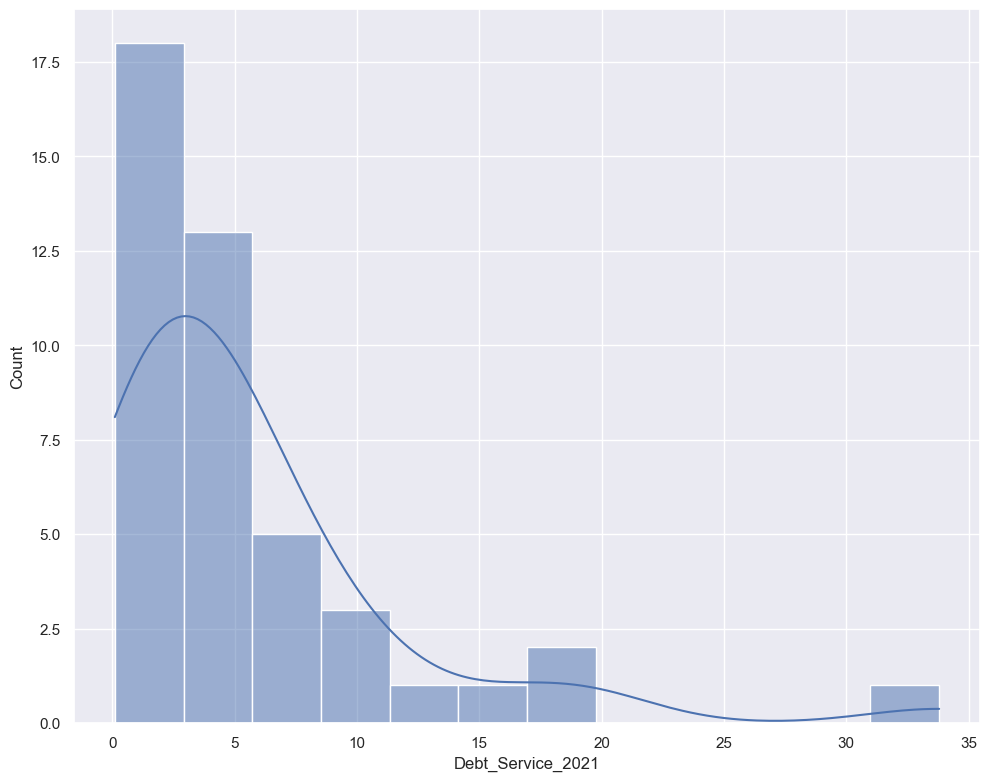

In [137]:
sns.histplot(data=dataset_regression_lower_middle, x="Debt_Service_2021", kde=True)

<Axes: xlabel='Debt_Service_2021', ylabel='Count'>

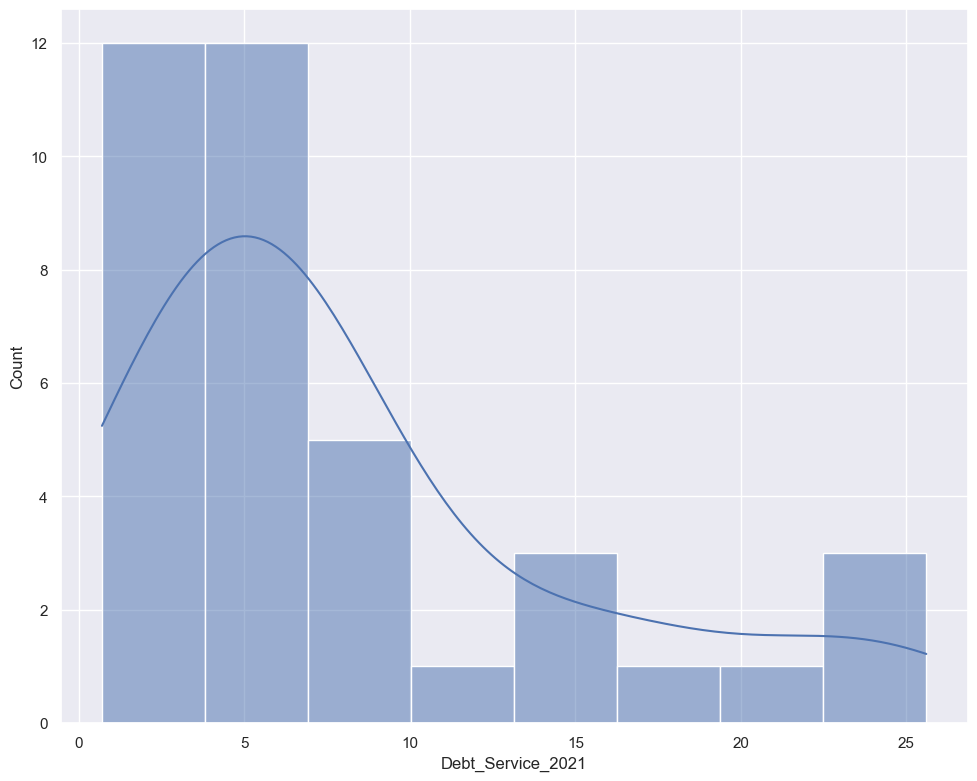

In [138]:
sns.histplot(data=dataset_regression_upper_middle, x="Debt_Service_2021", kde=True)

<Axes: xlabel='GDP_Growth_2021', ylabel='Count'>

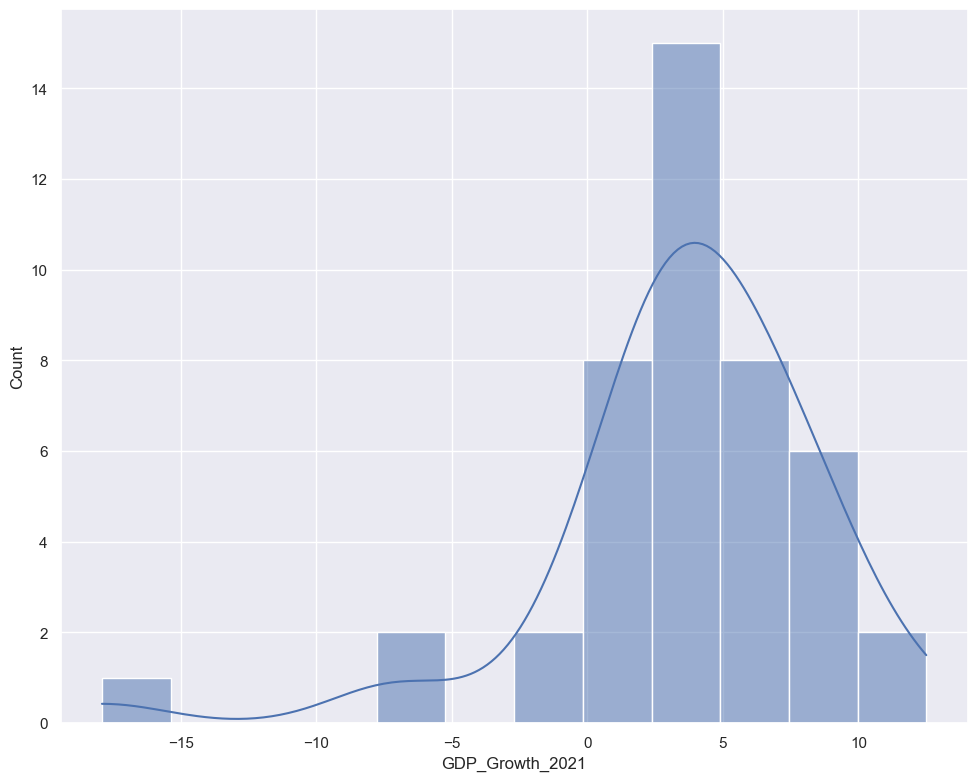

In [139]:
sns.histplot(data=dataset_regression_lower_middle, x="GDP_Growth_2021", kde=True)

<Axes: xlabel='GDP_Growth_2021', ylabel='Count'>

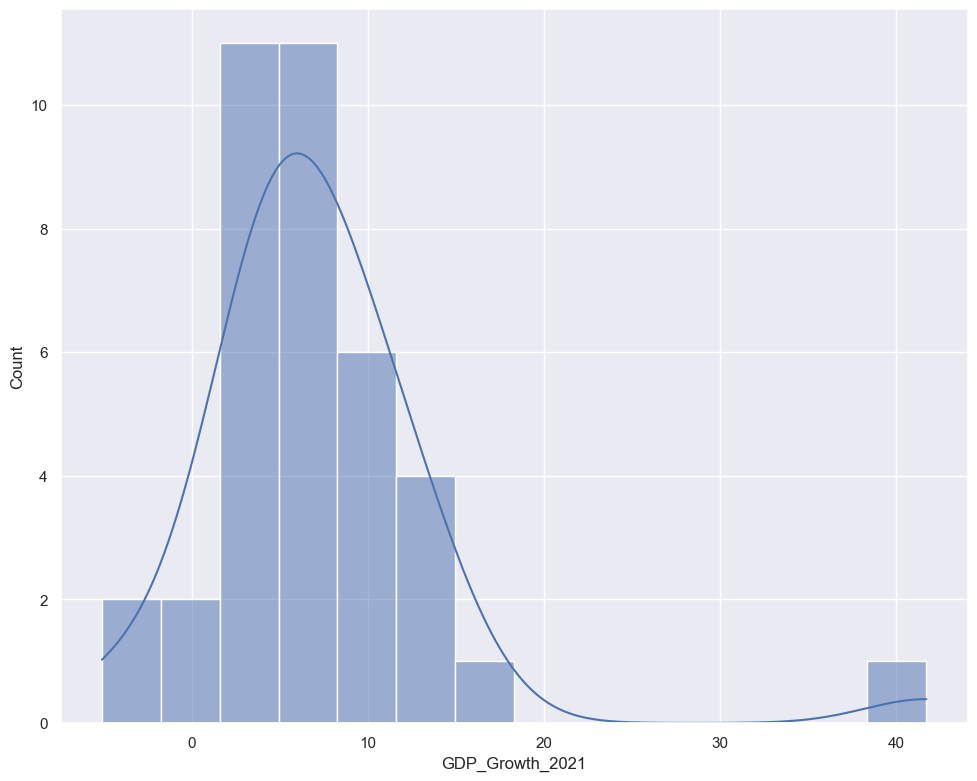

In [140]:
sns.histplot(data=dataset_regression_upper_middle, x="GDP_Growth_2021", kde=True)

In [142]:
dataset_regression_lower_middle.describe()

,Debt_Service_2021,GDP_Growth_2021
count,44.000000,44.000000
mean,5.518182,3.550000
std,6.387935,5.095666
min,0.100000,-17.900000
25%,1.600000,2.050000
50%,3.950000,3.750000
75%,6.600000,6.600000
max,33.800000,12.500000


In [143]:
dataset_regression_upper_middle.describe()

,Debt_Service_2021,GDP_Growth_2021
count,38.000000,38.000000
mean,8.250000,7.321053
std,6.801619,7.154328
min,0.700000,-5.100000
25%,3.700000,4.225000
50%,6.300000,5.650000
75%,9.650000,10.025000
max,25.600000,41.700000


In [2]:
import pandas as pd
from scipy.stats import skew
import numpy as np

dataset_regression = pd.read_csv('ITRM_Assessment_2A_Dataset_Debt_Service_GDP_Growth.csv', 
                                 sep=';', decimal=',')
dataset_regression_lower_middle = dataset_regression[dataset_regression['Category']=='Lower Middle Income']
dataset_regression_upper_middle = dataset_regression[dataset_regression['Category']=='Upper Middle Income']

def skew_median_processor(dataset,columns, calc='median'):
    '''
    Function to calculate skewness or median of columns in dataframe
    Parameters
    ----------
    dataset : pandas dataframe
        Dataframe to be calculated skew or median
    columns : collective
        collective of columns to be processed
    calc    : str
        what to calculate: median or skew
    '''
    
    # columns in argument is a collective therefore iterable
    for col in columns:
        if calc=='median':
            med = dataset[col].median()
            print(f'{calc.capitalize()} of {col}: {med:,.2f}')
        elif calc=='skew':
            skewness = skew(dataset[col], axis=0, bias=True)
            print(f'{calc.capitalize()} of {col}: {skewness:,.2f}')
        elif calc=='variance':
            variance= np.var(dataset[col])
            print(f'{calc.capitalize()} of {col}: {variance:,.2f}')

skew_median_processor(dataset_regression_lower_middle,['Debt_Service_2021','GDP_Growth_2021'], calc='skew')
skew_median_processor(dataset_regression_upper_middle,['Debt_Service_2021','GDP_Growth_2021'], calc='skew')
skew_median_processor(dataset_regression_lower_middle,['Debt_Service_2021','GDP_Growth_2021'])
skew_median_processor(dataset_regression_upper_middle,['Debt_Service_2021','GDP_Growth_2021'])
skew_median_processor(dataset_regression_lower_middle,['Debt_Service_2021','GDP_Growth_2021'], calc='variance')
skew_median_processor(dataset_regression_upper_middle,['Debt_Service_2021','GDP_Growth_2021'], calc='variance')


# Output:
# Skew of Debt_Service_2021: 2.52
# Skew of GDP_Growth_2021: -1.89
# Skew of Debt_Service_2021: 1.23
# Skew of GDP_Growth_2021: 2.84
# Median of Debt_Service_2021: 3.95
# Median of GDP_Growth_2021: 3.75
# Median of Debt_Service_2021: 6.30
# Median of GDP_Growth_2021: 5.65
# Variance of Debt_Service_2021: 39.88
# Variance of GDP_Growth_2021: 25.38
# Variance of Debt_Service_2021: 45.04
# Variance of GDP_Growth_2021: 49.84

Skew of Debt_Service_2021: 2.52
Skew of GDP_Growth_2021: -1.89
Skew of Debt_Service_2021: 1.23
Skew of GDP_Growth_2021: 2.84
Median of Debt_Service_2021: 3.95
Median of GDP_Growth_2021: 3.75
Median of Debt_Service_2021: 6.30
Median of GDP_Growth_2021: 5.65
Variance of Debt_Service_2021: 39.88
Variance of GDP_Growth_2021: 25.38
Variance of Debt_Service_2021: 45.04
Variance of GDP_Growth_2021: 49.84
